In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [8]:
df = pd.read_csv('sb_data.csv')
df = df[['pa','r_total_stolen_base','sprint_speed']]
col_mapping = {'r_total_stolen_base' : 'sb'}
df.rename(columns=col_mapping, inplace=True)
df = df.sort_values(by = 'sprint_speed')

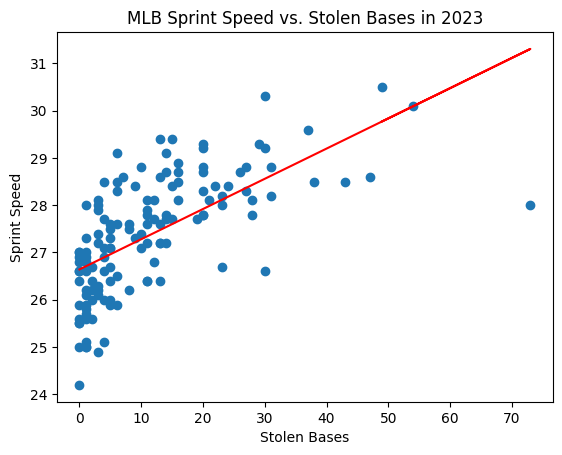

In [9]:
slope, intercept, r_value, p_value, std_err = linregress(df['sb'], df['sprint_speed'])

plt.scatter(df['sb'],df['sprint_speed'])
plt.xlabel("Stolen Bases")
plt.ylabel("Sprint Speed")
plt.title("MLB Sprint Speed vs. Stolen Bases in 2023")

regression_line = np.polyval([slope, intercept], df['sb'])
plt.plot(df['sb'], regression_line, color='red', label='Regression Line')

plt.show()